# Predicting the price of used cars

In [ ]:
#dataset from Kaggle

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Reading the files

In [156]:
p=pd.read_csv('train-data.csv')


In [157]:
p.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Looking at the info of the file uploaded

In [158]:
p.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Now checking the null values in the figure

In [159]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [160]:
print(p.shape)  #shape of the data


(6019, 14)


# Dropping Unnamed and New_Price(as it contains null values)

In [161]:
p.drop('Unnamed: 0', axis =1 , inplace = True)
p.drop('New_Price',axis =1 , inplace = True)
p.drop('Name',axis =1 , inplace = True)

In [162]:
p.describe() # describing the data

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


# We have power Engine Milage with their units which will create a problem for furter process so spliting it and taking only numeric values

In [163]:
string_vals = ['Power', 'Engine', 'Mileage']
for col in string_vals:
    
    p[col] = pd.to_numeric(p[col].str.split().str.get(0),errors='coerce')

In [164]:
p.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [165]:
p.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [166]:
p.dropna()  # Removing all the rows which have null values


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [167]:
p=p.reset_index(drop=True) # resetting the index of the dataset

In [168]:
{column : len(p[column].unique()) for column in p.columns   # getting the length of unique objects in the columns
if p.dtypes[column]=='object'}

{'Location': 11, 'Fuel_Type': 5, 'Transmission': 2, 'Owner_Type': 4}

# Visualizing the graphs between differnt features

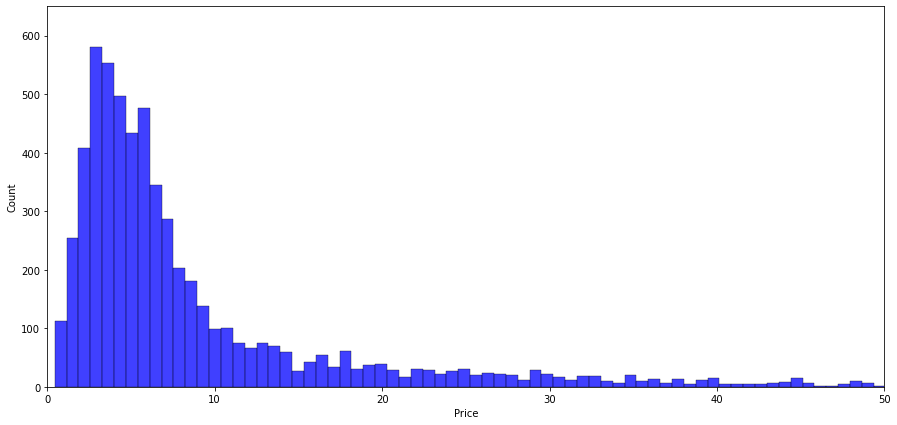

In [169]:
plt.subplots(figsize=(15,7))
ax=sns.histplot(x='Price',data=p , color='blue')
ax.set_ylim(0,650)
ax.set_xlim(0,50)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

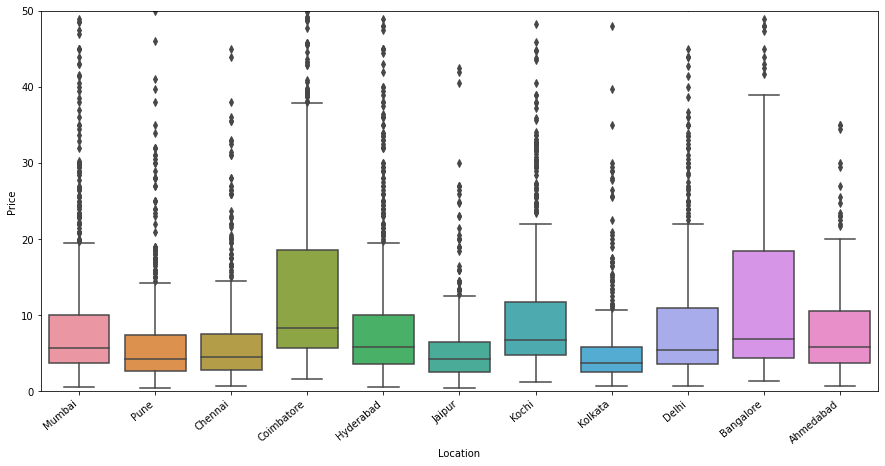

In [170]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Location',y='Price',data=p )
ax.set_ylim(0,50)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

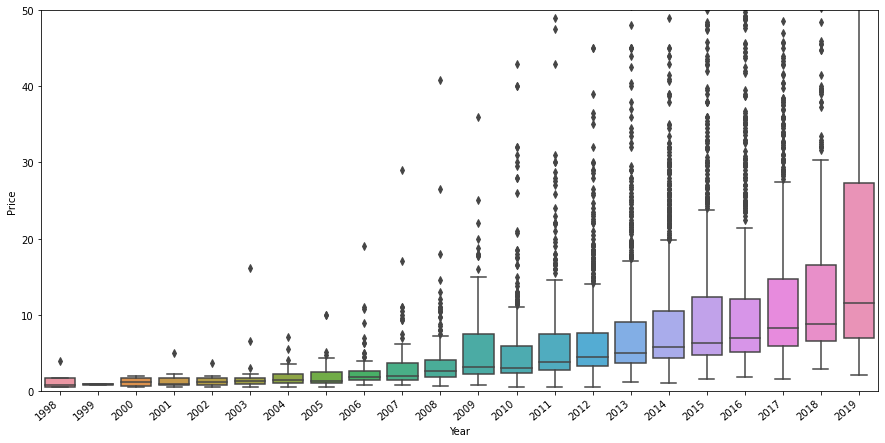

In [171]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Year',y='Price',data=p )
ax.set_ylim(0,50)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

(0.0, 60.0)

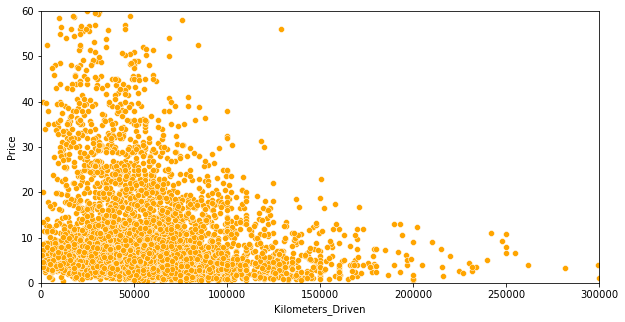

In [172]:
plt.subplots(figsize=(10,5))
a=sns.scatterplot(x='Kilometers_Driven',y='Price',data=p , color='orange')
a.set_xlim(0,300000)
a.set_ylim(0,60)

(0.0, 50.0)

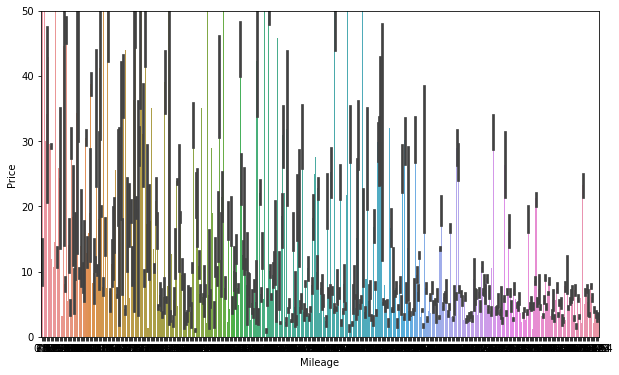

In [174]:
plt.subplots(figsize=(10,6))
b=sns.barplot(x='Mileage',y='Price',data=p)
b.set_ylim(0,50)

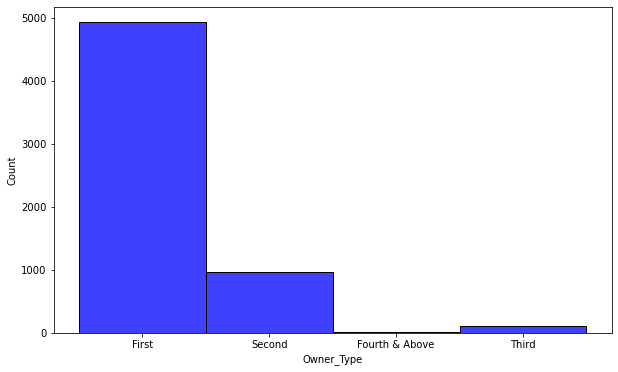

In [175]:
plt.subplots(figsize=(10,6))
b=sns.histplot(x='Owner_Type',data=p , color='blue')

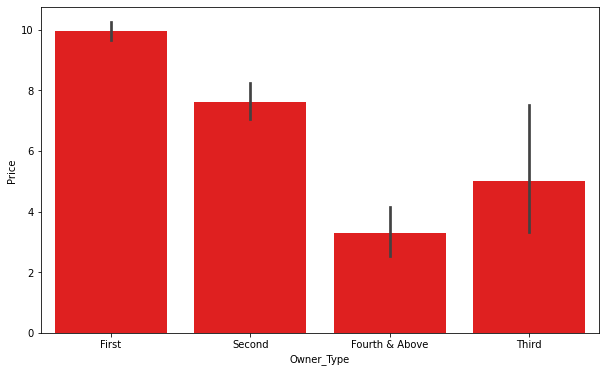

In [176]:
plt.subplots(figsize=(10,6))
b=sns.barplot(y='Price',x='Owner_Type',data=p , color='red')

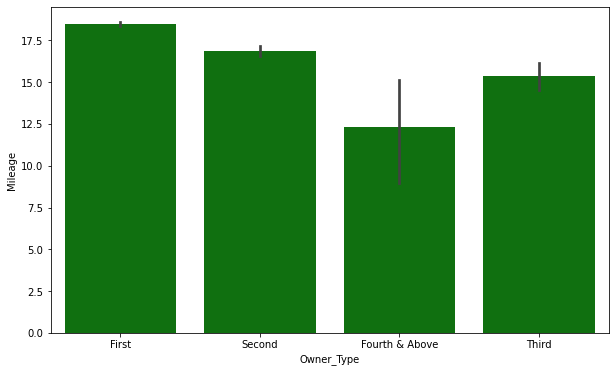

In [177]:
plt.subplots(figsize=(10,6))
b=sns.barplot(y='Mileage',x='Owner_Type',data=p , color='green')

In [178]:
p.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [179]:
print(p.Transmission.value_counts()) # checking the count of differnt unique features
print(p.Fuel_Type.value_counts())
print(p.Location.value_counts())

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


# As it is difficult to apply algoriths to string converting them to numeric

In [180]:
p.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
p.replace({'Transmission':{'Automatic':0,'Other':1,'Manual':2}},inplace=True)
p.replace({'Owner_Type':{'First':0,'Second':2,'Third':3,'Fourth & Above':4}},inplace=True)
#da.replace({'title_status':{'clean':0,'rebuilt':1,'lien':2,'missing':3,'salvage':4,'parts only':5}},inplace=True)
p.head(5)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,2,2,0,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,1,2,0,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,0,2,0,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,1,2,0,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [181]:
p["Current_Year"]=2021                                    #the main consideration will be how old the car is 
p["No_of_years"]=p["Current_Year"]-p["Year"]
p=p.drop(["Current_Year","Year"],axis=1)
p.dropna()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_years
0,Mumbai,72000,2,2,0,26.60,998.0,58.16,5.0,1.75,11
1,Pune,41000,1,2,0,19.67,1582.0,126.20,5.0,12.50,6
2,Chennai,46000,0,2,0,18.20,1199.0,88.70,5.0,4.50,10
3,Chennai,87000,1,2,0,20.77,1248.0,88.76,7.0,6.00,9
4,Coimbatore,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,8
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,1,2,0,28.40,1248.0,74.00,5.0,4.75,7
6015,Jaipur,100000,1,2,0,24.40,1120.0,71.00,5.0,4.00,6
6016,Jaipur,55000,1,2,2,14.00,2498.0,112.00,8.0,2.90,9
6017,Kolkata,46000,0,2,0,18.90,998.0,67.10,5.0,2.65,8


# Putting the values in X and Y for further calculations

In [182]:
p.dropna(inplace = True)
X=p[['Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','No_of_years']]
y=p['Price']



# Standardising the differnt features

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [184]:
X

array([[ 0.14846755,  2.74340404,  0.6388689 , ..., -1.02300765,
        -0.3524408 ,  1.09904   ],
       [-0.18789828,  0.83743285,  0.6388689 , ...,  0.23986179,
        -0.3524408 , -0.481089  ],
       [-0.13364573, -1.06853835,  0.6388689 , ..., -0.45616414,
        -0.3524408 ,  0.7830142 ],
       ...,
       [-0.03599113,  0.83743285,  0.6388689 , ..., -0.02370003,
         3.37420814,  0.4669884 ],
       [-0.13364573, -1.06853835,  0.6388689 , ..., -0.85707507,
        -0.3524408 ,  0.1509626 ],
       [-0.12279522,  0.83743285,  0.6388689 , ..., -1.03340163,
        -0.3524408 ,  0.7830142 ]])

In [185]:
y.shape

(5872,)

In [186]:
p.dropna()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_years
0,Mumbai,72000,2,2,0,26.60,998.0,58.16,5.0,1.75,11
1,Pune,41000,1,2,0,19.67,1582.0,126.20,5.0,12.50,6
2,Chennai,46000,0,2,0,18.20,1199.0,88.70,5.0,4.50,10
3,Chennai,87000,1,2,0,20.77,1248.0,88.76,7.0,6.00,9
4,Coimbatore,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,8
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,1,2,0,28.40,1248.0,74.00,5.0,4.75,7
6015,Jaipur,100000,1,2,0,24.40,1120.0,71.00,5.0,4.00,6
6016,Jaipur,55000,1,2,2,14.00,2498.0,112.00,8.0,2.90,9
6017,Kolkata,46000,0,2,0,18.90,998.0,67.10,5.0,2.65,8


In [187]:
p.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_years
0,Mumbai,72000,2,2,0,26.60,998.0,58.16,5.0,1.75,11
1,Pune,41000,1,2,0,19.67,1582.0,126.20,5.0,12.50,6
2,Chennai,46000,0,2,0,18.20,1199.0,88.70,5.0,4.50,10
3,Chennai,87000,1,2,0,20.77,1248.0,88.76,7.0,6.00,9
4,Coimbatore,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,8


# Linear Regression

In [188]:
lr=LinearRegression()

p=p.dropna

In [189]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=3)             # training the training set
print(X_train.shape,'\n',X_cv.shape,'\n',y_train.shape,'\n',y_cv.shape)            

(4697, 9) 
 (1175, 9) 
 (4697,) 
 (1175,)


In [190]:

lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_predict=lr.predict(X_train)
y_cv_predict=lr.predict(X_cv)
print("MSE on Training Set (Linear Regression):",
      mean_squared_error(y_train_predict, y_train))

print("MSE on CrossValidation Set (Linear Regression):",
      mean_squared_error(y_cv, y_cv_predict))
print("accuracy score on training set:",
      lr.score(X_train, y_train))
print("accuracy score on cross validation set:",
      lr.score(X_cv, y_cv))

MSE on Training Set (Linear Regression): 40.297300623970216
MSE on CrossValidation Set (Linear Regression): 29.840750753432882
accuracy score on training set: 0.6923433758950195
accuracy score on cross validation set: 0.725077693265257


# Decision Tree Algorithms

In [205]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)             # training the training set
print(X_train.shape,'\n',X_cv.shape,'\n',y_train.shape,'\n',y_cv.shape)   

(4697, 9) 
 (1175, 9) 
 (4697,) 
 (1175,)


In [206]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=4,random_state=8,splitter='best')
DTR.fit(X_train,y_train)
y_train_predict=DTR.predict(X_train)
y_cv_predict=DTR.predict(X_cv)
print('MSE on Training Set(DecisionTree):',
      mean_squared_error(y_train,y_train_predict))
print('MSE on CrossValidation Set(DecisionTree):',
     mean_squared_error(y_cv,y_cv_predict))
print('Accuracy on Training Set(DecisionTree):',
      DTR.score(X_train,y_train))
print('Accuracy on CrossValidation Set(DecisionTree):',
     DTR.score(X_cv,y_cv))

MSE on Training Set(DecisionTree): 26.443208671081685
MSE on CrossValidation Set(DecisionTree): 23.94714050596061
Accuracy on Training Set(DecisionTree): 0.7921258313638055
Accuracy on CrossValidation Set(DecisionTree): 0.8065729799595196


# Random Forest Regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=7)
rf.fit(X_train,y_train)
y_train_predict=rf.predict(X_train)
y_cv_predict=rf.predict(X_cv)
print("MSE on Training Set (RandomForest):",
      mean_squared_error(y_train,y_train_predict))
print("MSE on CrossValidation Set (RandomForest):",
      mean_squared_error(y_cv, y_cv_predict))
print("accuracy score on training set:",
      rf.score(X_train, y_train))
print("accuracy score on cross validation set:",
      rf.score(X_cv, y_cv))

MSE on Training Set (RandomForest): 2.2199605692608655
MSE on CrossValidation Set (RandomForest): 9.169699582695703
accuracy score on training set: 0.9825485453191275
accuracy score on cross validation set: 0.9259340519380262
